# Inference for categorical data

In [5]:
library(statsr)
library(dplyr)
library(ggplot2)

Loading required package: BayesFactor
Loading required package: coda
Loading required package: Matrix
************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
data(atheism)

In [7]:
str(atheism)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	88032 obs. of  3 variables:
 $ nationality: Factor w/ 57 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ response   : Factor w/ 2 levels "atheist","non-atheist": 2 2 2 2 2 2 2 2 2 2 ...
 $ year       : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...


In [8]:
us12 <- atheism %>%
  filter(nationality == "United States" , atheism$year == "2012")

Single categorical variable, success: atheist
n = 1002, p-hat = 0.0499
95% CI: (0.0364 , 0.0634)


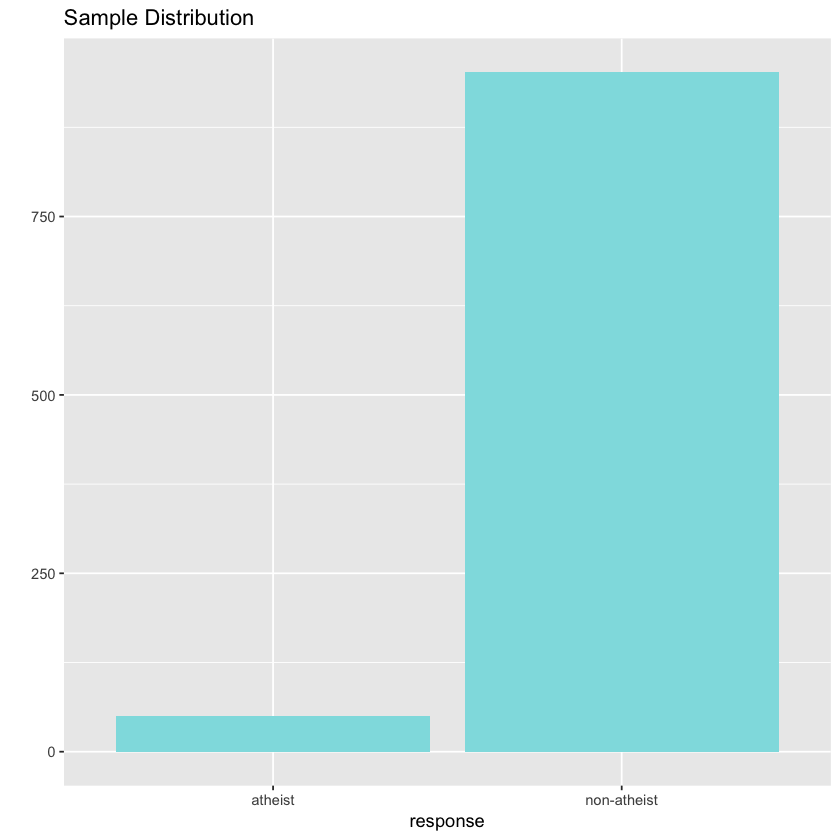

In [9]:
inference(
    y = response,
    data = us12,
    statistic = "proportion",
    type = "ci",
    method = "theoretical",
    success = "atheist"
)

# Q: Imagine that, after reading a front page story about the latest public opinion poll, a family member asks you, “What is a margin of error?” In one sentence, and ignoring the mechanics behind the calculation, how would you respond in a way that conveys the general concept?

# A: It is the radius of the interval, centered at the estimate, that captures the true value a large percentage of the time, assuming this methodology is used.

# Q: Based on the R output, what is the margin of error for the estimate of the proportion of the proportion of atheists in US in 2012?

- The margin of error for the estimate of the proportion of atheists in the US in 2012 is 0.05.
- The margin of error for the estimate of the proportion of atheists in the US in 2012 is 0.025.
- The margin of error for the estimate of the proportion of atheists in the US in 2012 is 0.0135.

# A: The margin of error for the estimate of the proportion of atheists in the US in 2012 is `0.0135`.

# Q: Using the inference function, calculate confidence intervals for the proportion of atheists in 2012 in two other countries of your choice, and report the associated margins of error. Be sure to note whether the conditions for inference are met. It may be helpful to create new data sets for each of the two countries first, and then use these data sets in the inference function to construct the confidence intervals.

# A:

#### Random Sampling
This is a given

#### Independence

We can surely conclude there are more than 10 * (number of atheists in this dataset) in the world and 10 * (number of theists in this dataset)

#### Normality of sampling distribution
Using the heuristic that we need to have more than 10 successes and 10 failures in our particular sample, we are good to go.

In [10]:
ca12 <- atheism %>%
  filter(nationality == "Canada" , year == "2012")

Single categorical variable, success: atheist
n = 1002, p-hat = 0.0898
95% CI: (0.0721 , 0.1075)


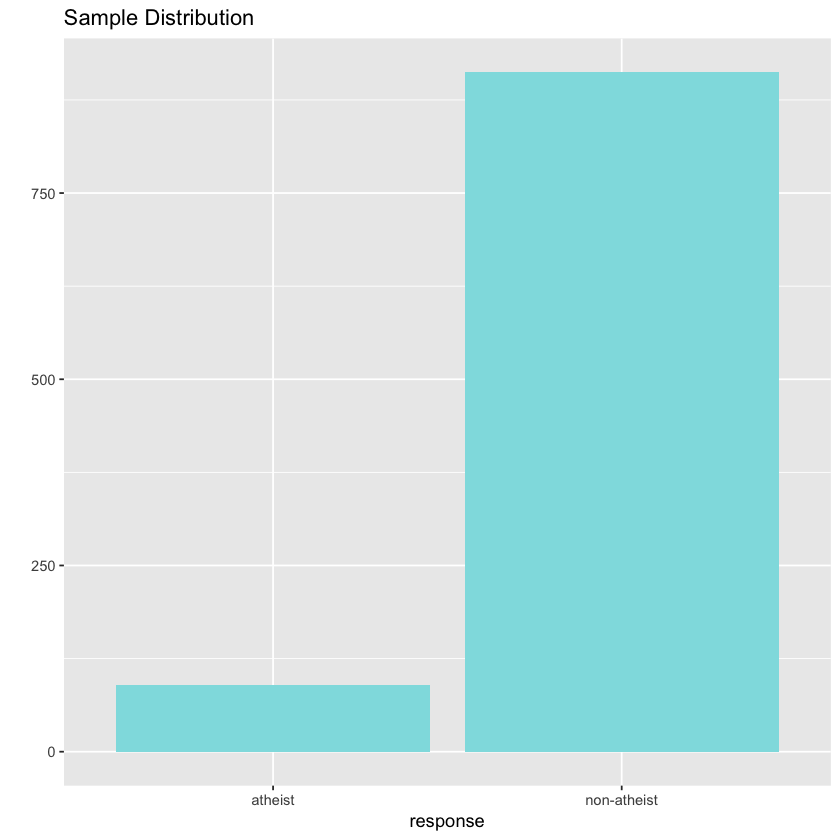

In [11]:
inference(
    y = response,
    data = ca12,
    statistic = "proportion",
    type = "ci",
    method = "theoretical",
    success = "atheist"
)

In [13]:
vietnam12 <- atheism %>%
  filter(nationality == "Vietnam" , year == "2012")

Single categorical variable, success: atheist
n = 500, p-hat = 0
95% CI: (0 , 0)


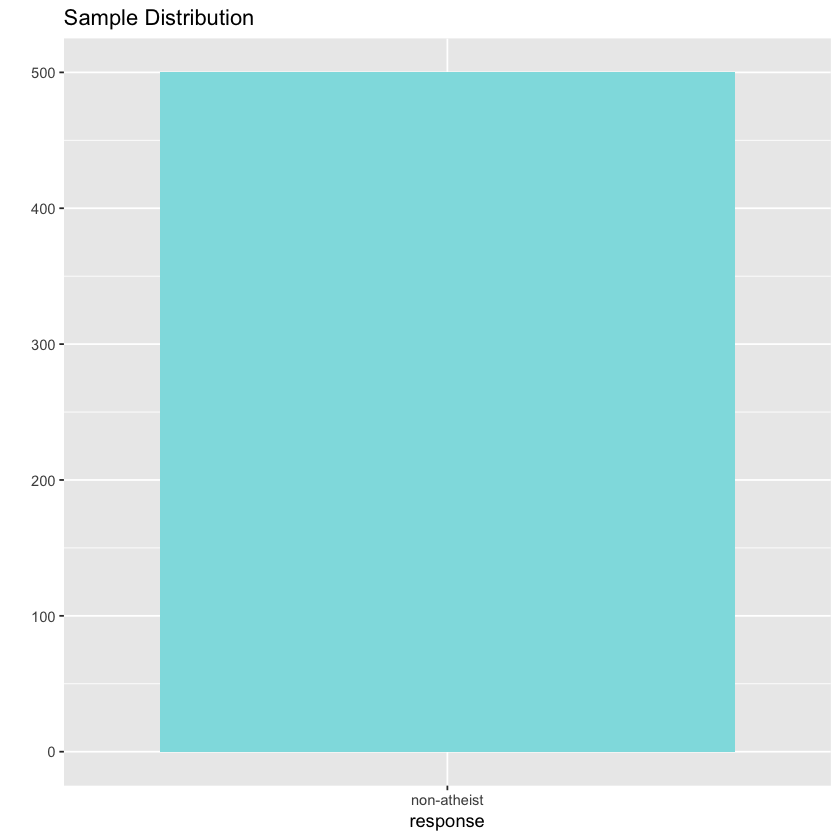

In [14]:
inference(
    y = response,
    data = vietnam12,
    statistic = "proportion",
    type = "ci",
    method = "theoretical",
    success = "atheist"
)

# Below: How the margin of error varies, in a sample of 1000, based on the proportion we're trying to estimate

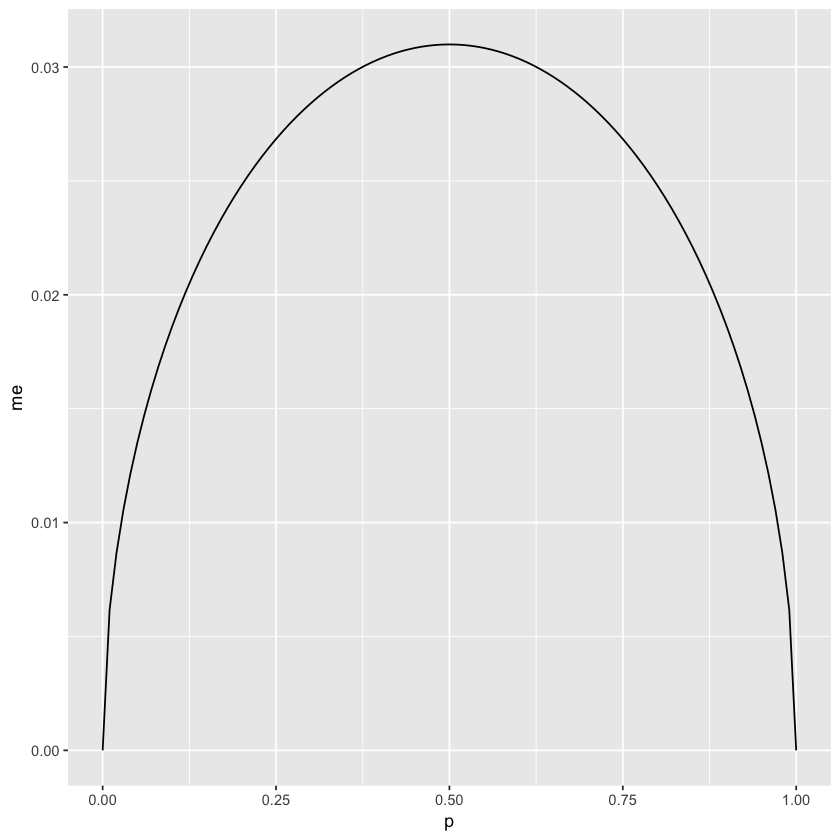

In [15]:
d <- data.frame(p <- seq(0, 1, 0.01))
n <- 1000
d <- d %>%
  mutate(me = 1.96*sqrt(p*(1 - p)/n))
ggplot(d, aes(x = p, y = me)) +
  geom_line()

# Q: Which of the following is false about the relationship between p and ME?
- The ME
 reaches a minimum at p=0
.
- The ME
 reaches a minimum at p=1
.
- The ME
 is maximized when p=0.5
.
- The most conservative estimate when calculating a confidence interval occurs when p
 is set to 1.

# A: The following is *false* - the most conservative estimate when calculating a confidence interval occurs when p is set to 1.

# Q: True / False: There is convincing evidence that Spain has seen a change in its atheism index between 2005 and 2012.

Single categorical variable, success: atheist
n = 2291, p-hat = 0.0952
95% CI: (0.0831 , 0.1072)


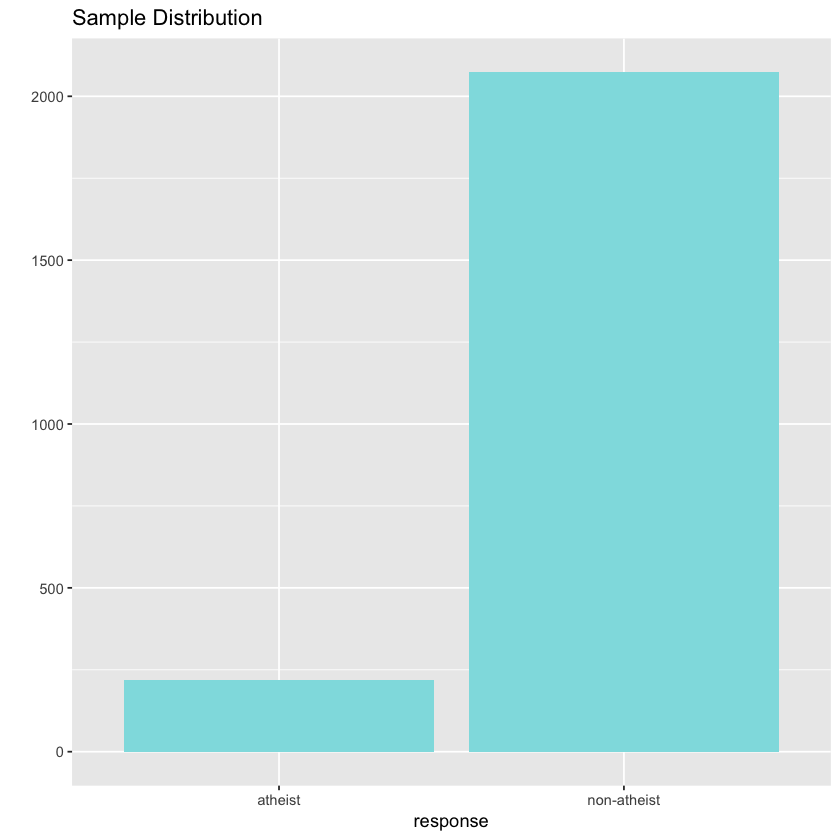

In [24]:
spain <- atheism %>% filter(nationality == "Spain") %>% group_by(year)

inference(
    y = response,
    data = spain,
    statistic = "proportion",
    type = "ci",
    method = "theoretical",
    success = "atheist"
)

# A: True

# Q: True / False: There is convincing evidence that the United States has seen a change in its atheism index between 2005 and 2012.

Single categorical variable, success: atheist
n = 2004, p-hat = 0.0299
95% CI: (0.0225 , 0.0374)


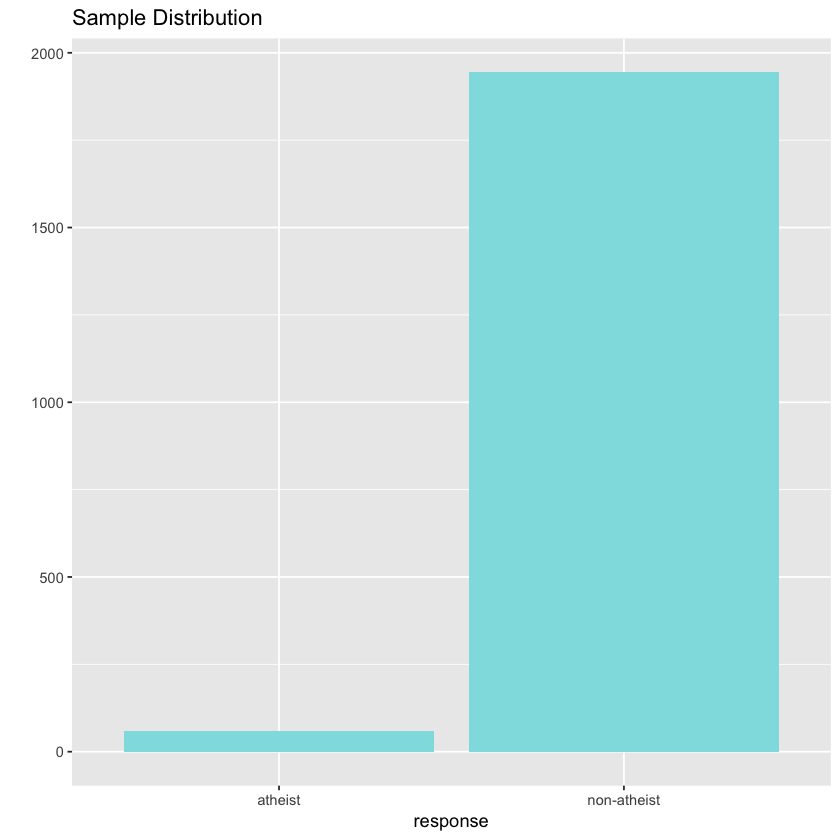

In [29]:
us <- atheism %>% filter(nationality == "United States") %>% group_by(year)

inference(
    y = response,
    data = us,
    statistic = "proportion",
    type = "ci",
    method = "theoretical",
    success = "atheist"
)

# A: True

# Q: Suppose you’re hired by the local government to estimate the proportion of residents that attend a religious service on a weekly basis. According to the guidelines, the estimate must have a margin of error no greater than 1% with 95% confidence. You have no idea what to expect for p. How many people would you have to sample to ensure that you are within the guidelines?
- 2401 people
- At least 2401 people
- 9604 people
- At least 9604 people

# A: 9604 people

In [31]:
qnorm(1-(.05/2))

[1] 1.959964

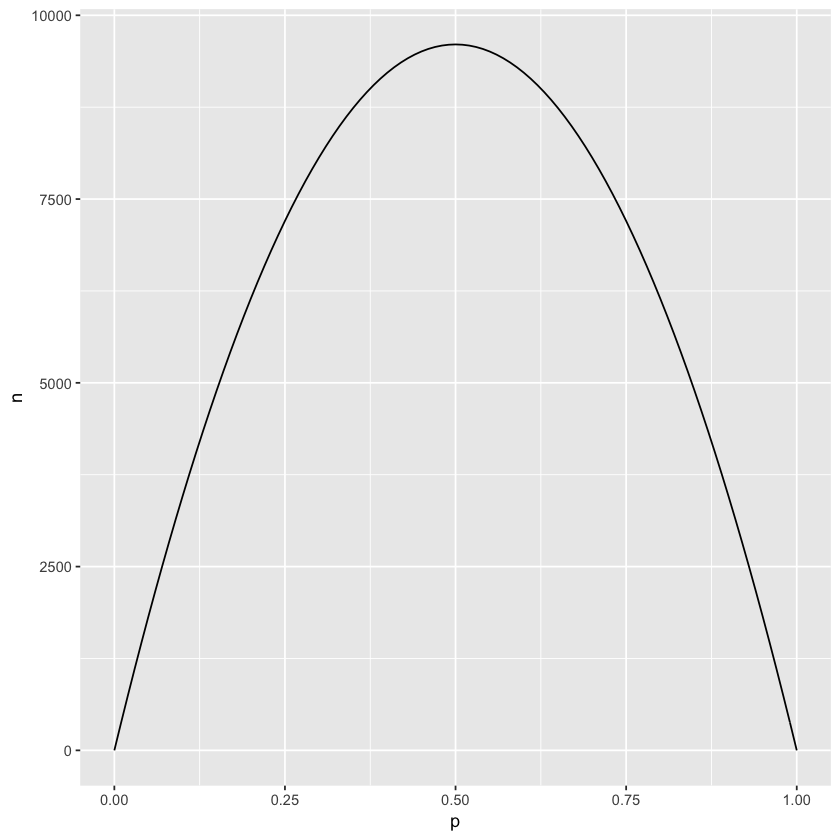

In [37]:
d <- data.frame(p <- seq(0, 1, 0.01))
# n <- 1000
d <- d %>%
    mutate(
        n = p*(1-p)/(.01/qnorm(1-(.05/2)))^2
    )
ggplot(d, aes(x = p, y = n)) +
  geom_line()